In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [34]:
train=pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')

train=train.drop(['id'],axis=1)
#test=test.drop(['id'],axis=1)

In [4]:
train.isnull().sum()

Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [7]:
train.dtypes

Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

<Axes: xlabel='Brand'>

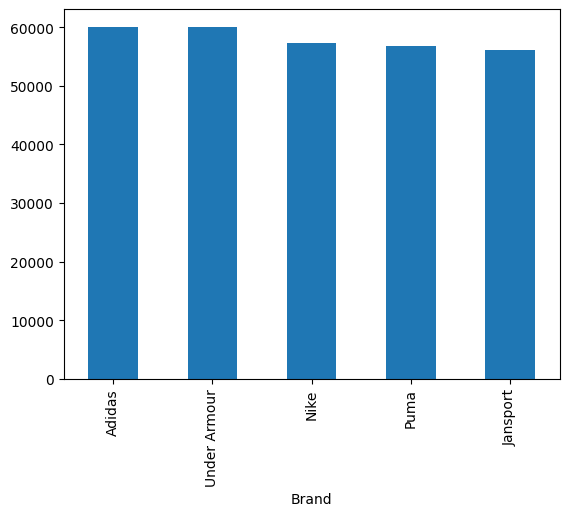

In [8]:
train['Brand'].value_counts().plot(kind='bar')

In [ ]:
material_counts = pd.crosstab(train["Brand"], train["Material"])

# Plot a stacked bar chart
material_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")

<Axes: xlabel='Brand'>

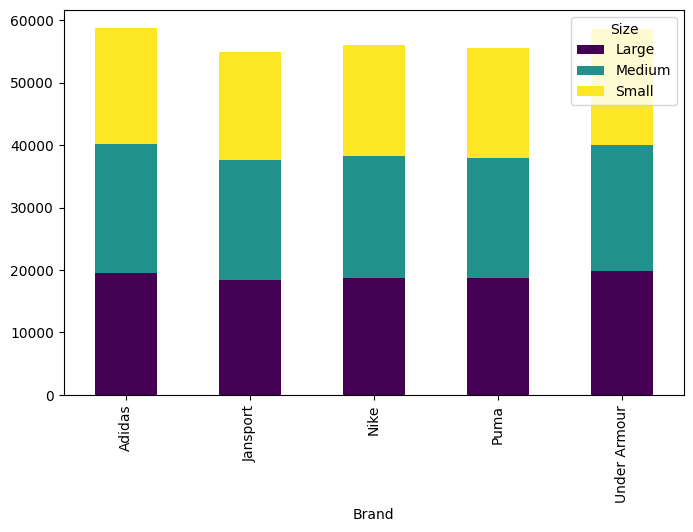

In [9]:
material_counts = pd.crosstab(train["Brand"], train["Size"])

# Plot a stacked bar chart
material_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")

In [15]:
import seaborn as sns

<Axes: xlabel='Weight Capacity (kg)', ylabel='Price'>

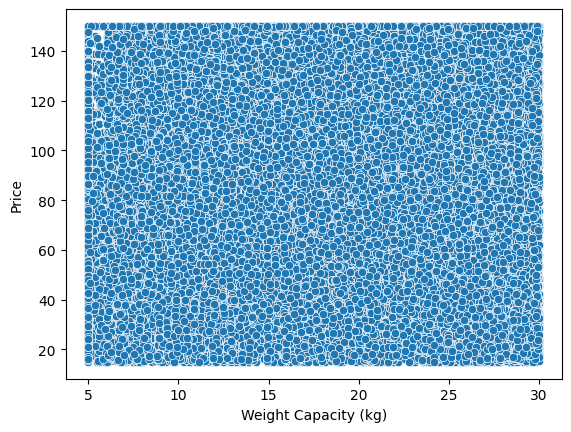

In [18]:
sns.scatterplot(x='Weight Capacity (kg)',y='Price', data=train[train['Brand']=='Under Armour'])

In [ ]:
train.dropna()

In [ ]:
train['Material'].unique()

In [ ]:
train['Color'].unique()

In [ ]:
train['Style'].unique()

In [ ]:
train['Price'].plot.hist(bins=100)

In [ ]:
train['Laptop Compartment']=train['Laptop Compartment'].replace(['No','Yes'],
                        [0, 1])
train['Waterproof']=train['Waterproof'].replace(['No','Yes'],
                        [0, 1])


train['Brand']=train['Brand'].replace(['Jansport', 'Under Armour', 'Nike', 'Adidas', 'Puma'],
                        [0, 1,2,3,4])
train['Color']=train['Color'].replace(['Black', 'Green', 'Red', 'Blue', 'Gray', 'Pink'],
                        [0, 1, 2, 3 ,4 ,5])
train['Style']=train['Style'].replace(['Tote', 'Messenger', 'Backpack'],
                        [0, 1,2])

train['Material']=train['Material'].replace(['Leather', 'Canvas', 'Nylon', 'Polyester'],
                        [0, 1,2, 3])
train['Size']=train['Size'].replace(['Small', 'Medium', 'Large'],
                        [0, 1,2])

In [ ]:
train

In [ ]:
train=train.dropna()

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
rng = np.random.RandomState(0)

from sklearn.ensemble import RandomForestRegressor

# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

N_SPLITS = 4
regressor = RandomForestRegressor(random_state=0)


In [ ]:
def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return impute_scores

In [ ]:
def get_impute_knn_score(X_missing, y_missing):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return knn_impute_scores.mean(), knn_impute_scores.std()


a,b = get_impute_knn_score(
    X,y
)

In [ ]:
imputer = KNNImputer(n_neighbors=2)
trainimp = imputer.fit_transform(train)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
X=train.drop(['Price'],axis=1)
y=train['Price']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=1)
model.fit(X_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [26]:
xgbpreds=model.predict(X_test)

array([82.015594, 80.342964, 80.88532 , ..., 80.4375  , 81.77391 ,
       80.61618 ], dtype=float32)

In [28]:
mean_squared_error(xgbpreds,y_test,squared=False)

39.191550471140076

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [23]:
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to test
    cv=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-random_search.best_score_):.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best RMSE: 38.9976


In [25]:
model = XGBRegressor(**random_search.best_params_, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
random_search.best_params_

In [29]:
test

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953
...,...,...,...,...,...,...,...,...,...
199995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498
199996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394
199997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163
199998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153


In [30]:
test['Laptop Compartment']=test['Laptop Compartment'].replace(['No','Yes'],
                        [0, 1])
test['Waterproof']=test['Waterproof'].replace(['No','Yes'],
                        [0, 1])


test['Brand']=test['Brand'].replace(['Jansport', 'Under Armour', 'Nike', 'Adidas', 'Puma'],
                        [0, 1,2,3,4])
test['Color']=test['Color'].replace(['Black', 'Green', 'Red', 'Blue', 'Gray', 'Pink'],
                        [0, 1, 2, 3 ,4 ,5])
test['Style']=test['Style'].replace(['Tote', 'Messenger', 'Backpack'],
                        [0, 1,2])

test['Material']=test['Material'].replace(['Leather', 'Canvas', 'Nylon', 'Polyester'],
                        [0, 1,2, 3])
test['Size']=test['Size'].replace(['Small', 'Medium', 'Large'],
                        [0, 1,2])

<ipython-input-30-95af111c4cee>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Laptop Compartment']=test['Laptop Compartment'].replace(['No','Yes'],
<ipython-input-30-95af111c4cee>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Waterproof']=test['Waterproof'].replace(['No','Yes'],
<ipython-input-30-95af111c4cee>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fu

In [31]:
test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,20.671147
1,2.0,1.0,1.0,7.0,0.0,1.0,2.0,1.0,13.564105
2,3.0,1.0,2.0,9.0,0.0,1.0,1.0,3.0,11.809799
3,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,18.477036
4,NaN,2.0,2.0,2.0,1.0,1.0,0.0,0.0,9.907953
...,...,...,...,...,...,...,...,...,...
199995,3.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0,7.383498
199996,2.0,3.0,0.0,9.0,0.0,1.0,1.0,5.0,6.058394
199997,0.0,2.0,0.0,9.0,0.0,1.0,0.0,1.0,26.890163
199998,4.0,2.0,2.0,10.0,1.0,0.0,0.0,4.0,25.769153


In [33]:
a=model.predict(test)

In [36]:
submission_df = pd.DataFrame({
    'id': test['id'],
    'Price':a
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)

submission_df.head(5)

,id,Price
0,300000,81.283424
1,300001,81.507309
2,300002,81.677734
3,300003,82.167076
4,300004,78.835968


In [ ]:
xgbpreds=

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

In [ ]:
preds=lr.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(preds,y_test,squared=False)

In [ ]:
test.isnull().sum()